In [242]:
using MathTeXEngine, CairoMakie, LinearAlgebra
using StaticArrays
textheme = Theme(fonts=(; regular=texfont(:text),
                        bold=texfont(:bold),
                        italic=texfont(:italic),
                        bold_italic=texfont(:bolditalic)))

Attributes with 1 entry:
  fonts => Attributes with 4 entries:
    bold => FTFont (family = NewComputerModern, style = 10 Bold)
    bold_italic => FTFont (family = NewComputerModern, style = 10 Bold Italic)
    italic => FTFont (family = NewComputerModern, style = 10 Italic)
    regular => FTFont (family = NewComputerModern Math, style = Regular)

# Computational Physics: Homework 8
## The magnetic field of a current loop
### A Pair Programming Project
Due: Wednesday 5 Mar 2024  before 9am

<hr style="border-top: 1px solid purple; margin-top: 1px; border: 1px solid red"></hr>

## General task on this assignment
Your goal in this assignment is to extend the code we create in class 15 so that you can compute the magnetic field in three dimensions. 
You will also be making a [streamplot](https://beautiful.makie.org/examples/2d/streamplot/streamplot) of the magnetic field in several circumstances. 
General guidelines:<br>

a. Always use markdown cells to explain your thinking.</br>
b. If I ask for **a function**, create **one** function which accomplishes what I asked. </br>
c. Make sure to test each function you compose; in this assignment, I will ask lead you through this process.</br>
d. When you are finished, and before submitting the assignment, make sure to restart the kernel and run all cells to insure everything works.<br>

For this homework assignment, the current loop is assumed to lie in the $xy$ plane with the coordinate origin placed at the center of the loop (which has radius R, and carries current I as shown below. Keep in mind that in this problem, we are **not** evaluating the field on the z-axis (although your code should work in that case), but at some general point at $\mathbf{r_p} = [x,y,z]$. The geometry is shown below; in the figure, $\vec{r}^{\prime}$ points from the origin to the small chunk of *source current*, and $\vec{r}$ points from the *source* to the *field point*.

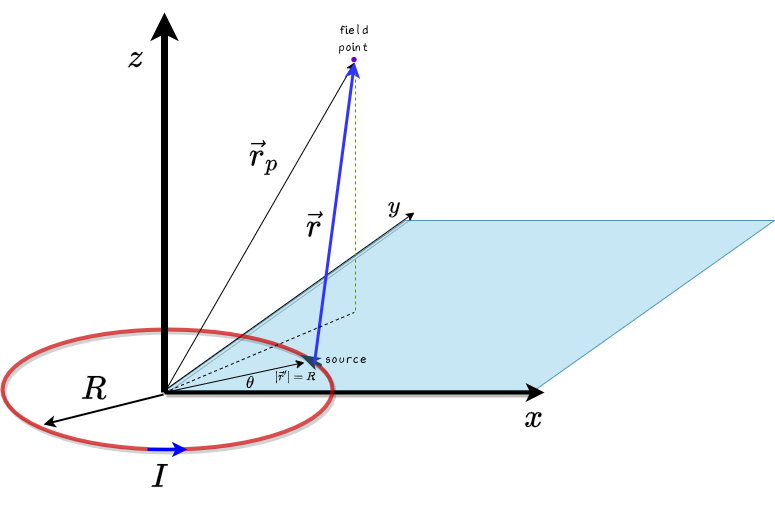

## Part 1: Modifying our code from Class 15
### (a)  First: some algebra
Before writing any code, compose in the markdown cell below, expressions for the following quantities:</br>
a. $I \vec{dl}$; as a vector with three components,</br>
b. $\vec{r}$; as another vector with three components. You can use the same trick we used in class to express $\vec{r}$ in terms of $\vec{r}^{\prime}$ and $\vec{r}_p$.

Use $\LaTeX$ to write expressions for these two quantities in the cell below:

### (b) Second: Compose your function to compute $\vec{B}$

In the cell below, create a single function called `Bxyz(r, N; I=1.0, R=1.0)`
which takes as input a three-component Cartesian vector $\mathbf{r_p}$,  at which you will compute the magnetic field. 
The quantity N describes how many points you chunks you will break up the current loop into in order to numerically integrate 
the Biot-Savart law:

$$d\mathbf{B} = \frac{\mu_o}{4\pi} \frac{\mathbf{I\,dl} \times \hat{r}}{r^2},$$

Requirements for  `Bxyz(r, N; I=1.0, R=1.0)`:</br>

i) All inputs are in SI units; therefore the computation of $B$ will be in Tesla, the SI usit for magnetic field strength,</br>
ii) After you compute $B$, convert the result to nano Tesla (nT) </br>
iii) Add a [docstring](https://gensoft.pasteur.fr/docs/julia/1.4.1/manual/documentation.html) to your function when you are satisfied that it works.</br>


<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

###  (c) Check the accuracy of your code
Before improving the speed, let's make sure that your code is reasonable. 
Here are a few checks to perform.
First, compute manually (i.e. using the analytic result we computed in class) 
the value of the magnetic field on the z-axis. Compose a function called `B(z; I=1.0, R=1.0)` 
which computes the magnetic field at any point on the z-axis.  Put your work in  the cell below:

Now use your two functions, `Bxyz()` and `B()` to compute the magnetic field along the z-axis from $z=-5$ to $z=+5$. 
You'll have to do a little thinking about how to use `Bxyz()` to compute the field at multiple points along the z-axis and then be
able to plot the resulting data. You are free to think of creative ways to do this. In any case, your task is to
plot B vs z for these two methods in the same plot---they should agree with each other! 

### (d) Fourth: Speed improvements
#### First step: getting the baseline computing time 
Time the speed of `Bxyz()` using the BenchmarkTools.jl package by typing the following code (yes, type it, do not copy and paste...say the words as you type):
```julia
using BenchmarkTools
@benchmark Bxyz([1.0,1.0,2.0],1000)
```
Do this in the cell below.

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

### Read about the @elapsed function
Now figure out how to compute the mean execution time for `Bxyz([1.0,1.0,2.0],1000)` and how to assign it to a variable, should the need arise. Show an example of this to convince me you can do this. .</br>
 [This link](https://stackoverflow.com/questions/66489315/how-to-store-the-output-of-time-to-a-variable) may prove useful to you ...😃...look around the page for info about the @elapsed macro
 which is part of the BenchmarkTools.jl package. The @elapsed time function returns a time in seconds.
 Put your code in the cell below:

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

### Exection speed as a function of N
Create a vector via a list comprehension of the exection times of `Bxyz([1.0,1.0,2.0],N)` as a function of the number, N, of integration steps. Assign this vector to the variable `baseTimes` and evaluate for values of N  between 10 and 300.

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

#### Plot the computation time vs N
Now make a beautiful Makie plot showing the execution time (in $\mu$s; you'll want to multiply the baseTimes values by $10^6$ to convert) as a function of N from 10 to 300.

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

Here's what I obtained for a brute force, not thinking about speed approach:

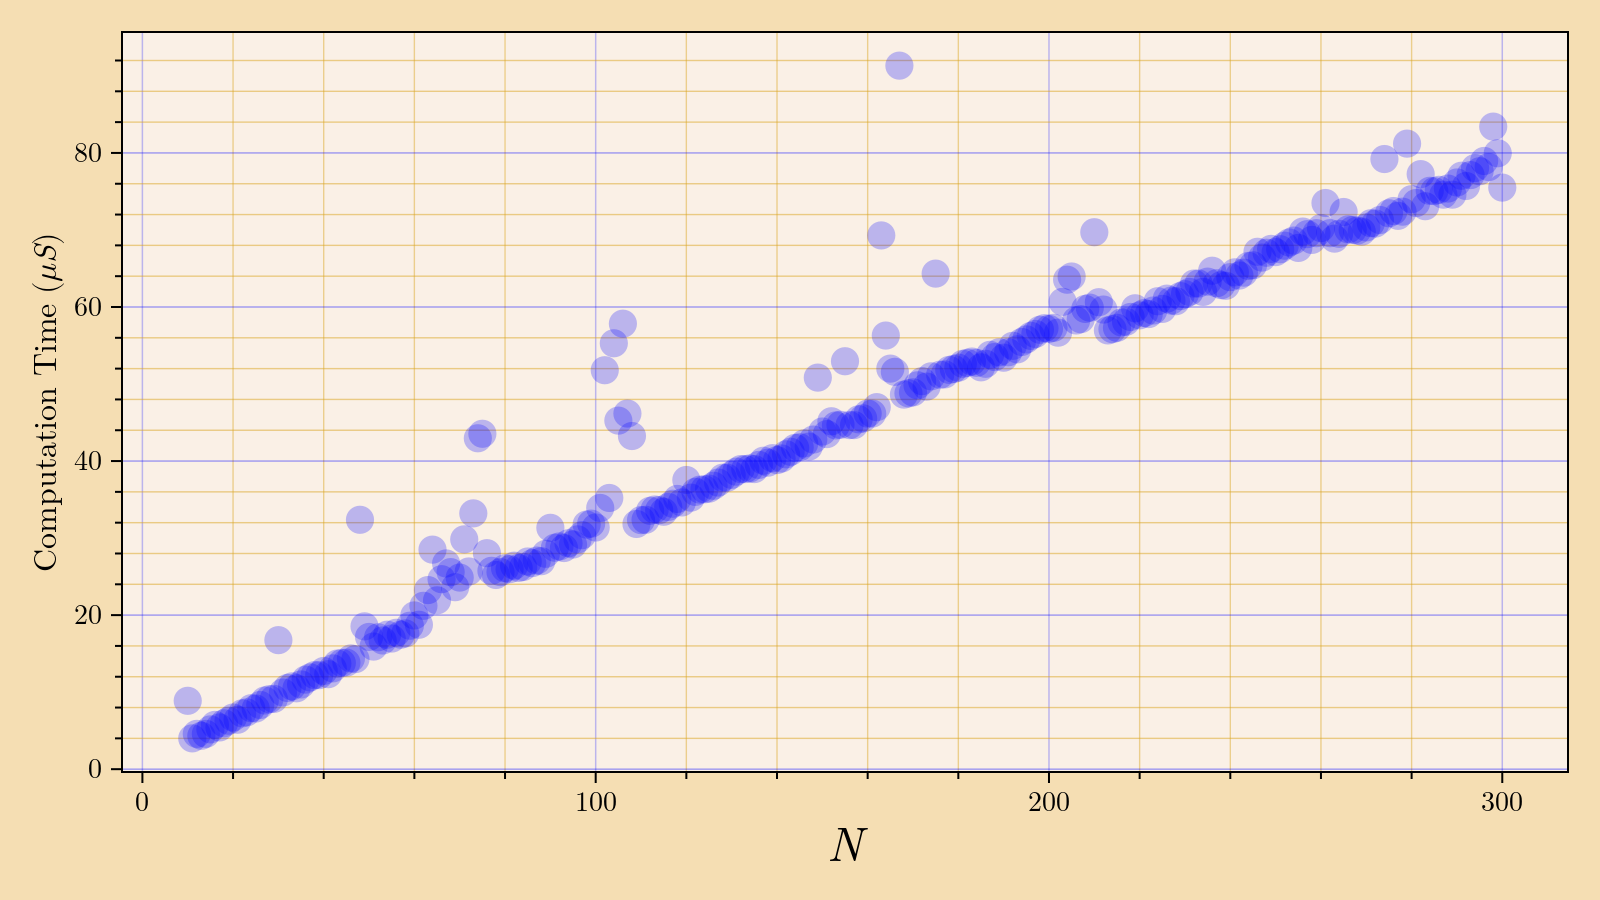

#### Second step: improving the speed of your code
Now, compose (in the cell below) a function called `B_fast(rₚ, N; I=1.0, R=1.0)`
which represents your best effort at improving the speed of your original 
function `Bxyz(rₚ, N; I=1.0, R=1.0)`. 



<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

#### Third step: show me speed tests of both the original and your improved code.
How does this ratio hold up as a function of N (the number of integration steps around the conducting ring). Make a plot to show me this ratio as a function of N from N=10 to N=(as big as you can reasonably go; probably 1 few hundred). By what factor did you reduce the computing time from the original?

    Place your work in a mix of code and markdown cells 

<hr style="border-top: 1px solid wheat; margin-top: 1px; border: 1px solid wheat"></hr>

Here's my resulting speedup for my code. See if you can beat a factor of 4 speedup :-) Extra credit for the fastest code !  😃

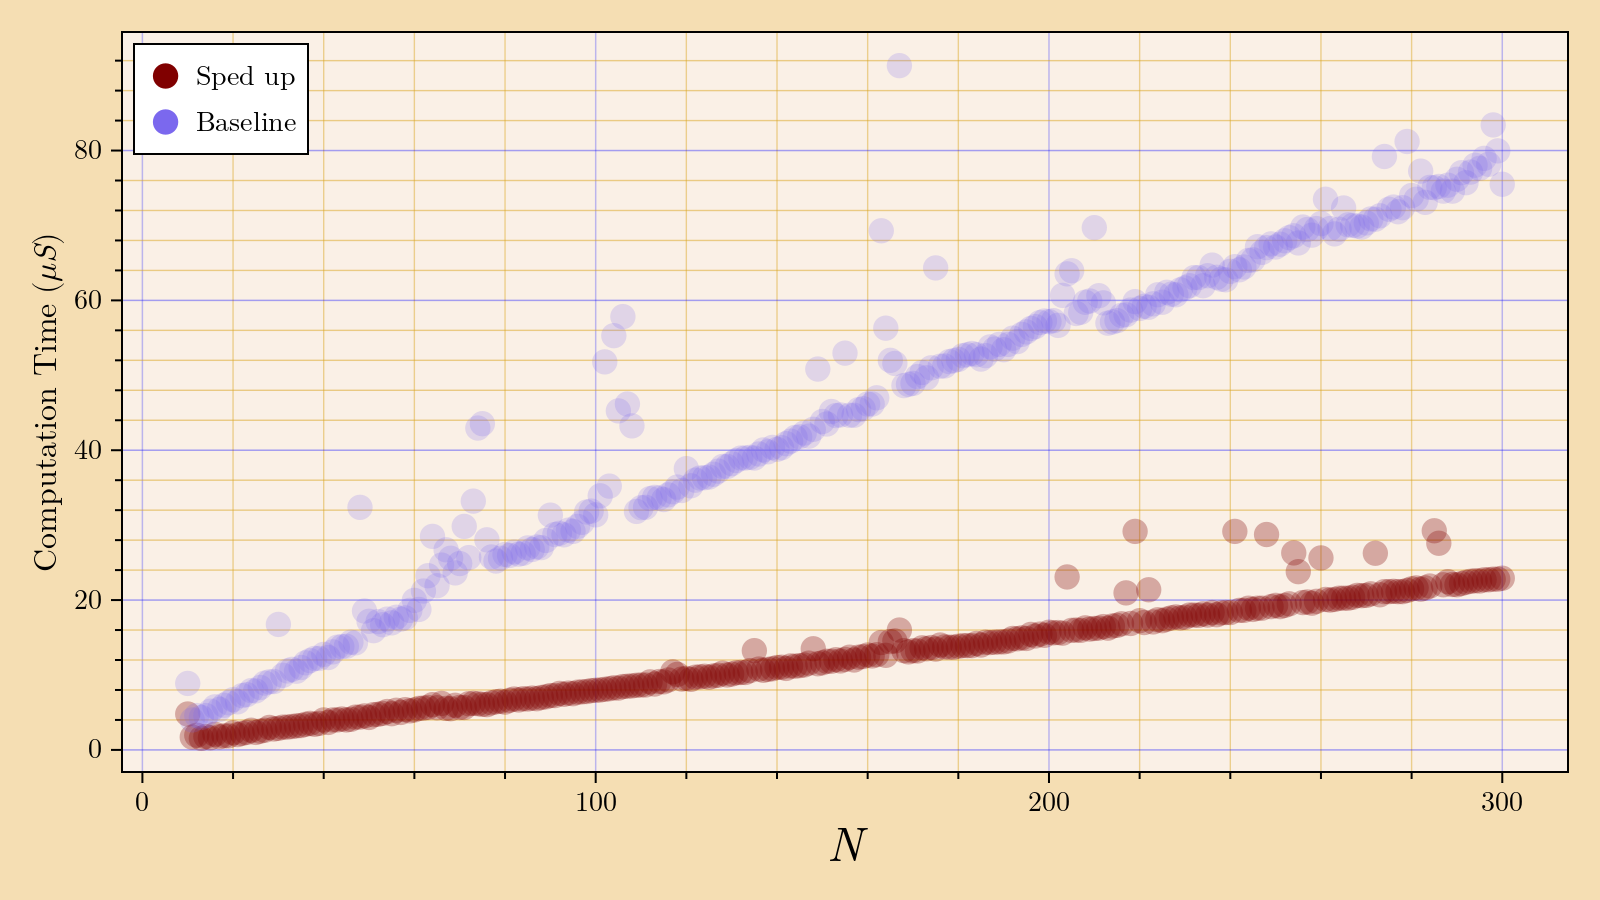

<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid red"></hr>